# Analysis

In [153]:
# The Vader sentiment analysis brought back few observations.
#1 The overall sentiment analysis for those few media groups are point in time and contextual to different events, thus the feedback brought by the analysis is obviously questionable and can't be extended to an overall sense of pertinent and true judgment.
# A longer timeframe analysis should be run to capture the overall mean sentiment of the users.
#2 NY Times came by far to be the most negative one with a mean score approaching -0.1 but things need to be put back in context. The scale ranges from 1 to -1, thus the overall score are almost pretty neutral.
#3 The neutral sentiment of all the media group tweets is notably perceived with the scatterplot showing a staggering point at a score of 0. 
#The nature of this score is likely neutral due to no extreme news or user judgments happening at that period.

In [154]:
# Import dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import seaborn as sb
import numpy as np
import datetime
from pprint import pprint
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [155]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [156]:
# Twitter credentials and APi authentification
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [157]:
# List to hold results
sentiment = []
# List to hold results
results_list = []

# Target Search Term
target_users = ("@BBC", "@CBC","@CNN","@FoxNews","NYTimes")

# Variables for holding sentiments
# compound_list = []
# positive_list = []
# negative_list = []
# neutral_list = []

In [158]:
# Loop through all target users
for user in target_users:
    
    # count the tweet    
    counter = 0
    
    # Grab 100 tweets
    public_tweets = api.search(user, count=100, result_type="recent")
#     pprint (public_tweets)
        
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweet_text = tweet["text"]
        tweets_count = counter

        #Add sentiments for ech tweet to the sentiments list
        sentiment.append ({"User": user,
            "Date": tweet["created_at"],
            "Compound": compound,
            "Positive": pos,
            "Neutral": neu,
            "Negative": neg,
            "Tweet text": tweet_text,
            "Tweet Count": counter})

        counter = counter + 1

            # Print the Sentiments
    pprint(sentiment)
    
    # Append airline results to 'results_list'
    results_list.append(sentiment)

[{'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:55 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 0,
  'Tweet text': "RT @BBC: 😺💦 This is Maya the jaguar's very first swim!  \n"
                '#BigCatsAboutTheHouse https://t.co/IacZP3ltf3',
  'User': '@BBC'},
 {'Compound': -0.6542,
  'Date': 'Sun Apr 08 21:02:53 +0000 2018',
  'Negative': 0.284,
  'Neutral': 0.716,
  'Positive': 0.0,
  'Tweet Count': 1,
  'Tweet text': 'RT @ThomasPride: Bizarre from the @BBC.\n'
                'A report about fishermen protesting but no interviews with '
                'fishermen, just with a billionaire (@Arr…',
  'User': '@BBC'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:48 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 2,
  'Tweet text': '@QuijoteMike @UKEmigration2EU @Andrew_Adonis @BrexitResist '
                '@bbcnickrobinson @BBC UK GDP 2016 was $2,600Bn. The UK c… '
                'https://t.co/umPjO2AzxV'

[{'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:55 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 0,
  'Tweet text': "RT @BBC: 😺💦 This is Maya the jaguar's very first swim!  \n"
                '#BigCatsAboutTheHouse https://t.co/IacZP3ltf3',
  'User': '@BBC'},
 {'Compound': -0.6542,
  'Date': 'Sun Apr 08 21:02:53 +0000 2018',
  'Negative': 0.284,
  'Neutral': 0.716,
  'Positive': 0.0,
  'Tweet Count': 1,
  'Tweet text': 'RT @ThomasPride: Bizarre from the @BBC.\n'
                'A report about fishermen protesting but no interviews with '
                'fishermen, just with a billionaire (@Arr…',
  'User': '@BBC'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:48 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 2,
  'Tweet text': '@QuijoteMike @UKEmigration2EU @Andrew_Adonis @BrexitResist '
                '@bbcnickrobinson @BBC UK GDP 2016 was $2,600Bn. The UK c… '
                'https://t.co/umPjO2AzxV'

                'make it last night in…',
  'User': '@CBC'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 20:55:30 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 25,
  'Tweet text': 'RT @J_wack: @FriedgeHNIC @Sportsnet @CBC @RonMacLeanHTH Hi '
                "guys, I am the little brother of Stephen Wack, who didn't "
                'make it last night in…',
  'User': '@CBC'},
 {'Compound': -0.4767,
  'Date': 'Sun Apr 08 20:54:42 +0000 2018',
  'Negative': 0.277,
  'Neutral': 0.621,
  'Positive': 0.102,
  'Tweet Count': 26,
  'Tweet text': '@cbc #Geoengineering aims to slow #globalwarming by '
                'manipulating #climate https://t.co/qzxfYLBGeV\n'
                'Playing with fire https://t.co/B1iONeNgdg',
  'User': '@CBC'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 20:54:13 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 27,
  'Tweet text': 'RT @J_wack: @FriedgeHNIC @Sportsnet @CBC @RonMacLeanHTH Hi 

[{'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:55 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 0,
  'Tweet text': "RT @BBC: 😺💦 This is Maya the jaguar's very first swim!  \n"
                '#BigCatsAboutTheHouse https://t.co/IacZP3ltf3',
  'User': '@BBC'},
 {'Compound': -0.6542,
  'Date': 'Sun Apr 08 21:02:53 +0000 2018',
  'Negative': 0.284,
  'Neutral': 0.716,
  'Positive': 0.0,
  'Tweet Count': 1,
  'Tweet text': 'RT @ThomasPride: Bizarre from the @BBC.\n'
                'A report about fishermen protesting but no interviews with '
                'fishermen, just with a billionaire (@Arr…',
  'User': '@BBC'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:48 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 2,
  'Tweet text': '@QuijoteMike @UKEmigration2EU @Andrew_Adonis @BrexitResist '
                '@bbcnickrobinson @BBC UK GDP 2016 was $2,600Bn. The UK c… '
                'https://t.co/umPjO2AzxV'

  'Positive': 0.0,
  'Tweet Count': 24,
  'Tweet text': 'RT @J_wack: @FriedgeHNIC @Sportsnet @CBC @RonMacLeanHTH Hi '
                "guys, I am the little brother of Stephen Wack, who didn't "
                'make it last night in…',
  'User': '@CBC'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 20:55:30 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 25,
  'Tweet text': 'RT @J_wack: @FriedgeHNIC @Sportsnet @CBC @RonMacLeanHTH Hi '
                "guys, I am the little brother of Stephen Wack, who didn't "
                'make it last night in…',
  'User': '@CBC'},
 {'Compound': -0.4767,
  'Date': 'Sun Apr 08 20:54:42 +0000 2018',
  'Negative': 0.277,
  'Neutral': 0.621,
  'Positive': 0.102,
  'Tweet Count': 26,
  'Tweet text': '@cbc #Geoengineering aims to slow #globalwarming by '
                'manipulating #climate https://t.co/qzxfYLBGeV\n'
                'Playing with fire https://t.co/B1iONeNgdg',
  'User': '@CBC'},
 {'Compound': 0.0,
  

 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:03:01 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 16,
  'Tweet text': '@KatyTurNBC @MSNBC @CNN @AriMelber @JoyAnnReid @CoryBooker '
                '@KamalaHarris @FBI @chrislhayes @maddow @PhilMurphyNJ… '
                'https://t.co/0YSK2JW85D',
  'User': '@CNN'},
 {'Compound': 0.128,
  'Date': 'Sun Apr 08 21:03:01 +0000 2018',
  'Negative': 0.105,
  'Neutral': 0.766,
  'Positive': 0.129,
  'Tweet Count': 17,
  'Tweet text': 'RT @CNN: Mexican President to Trump: "Nothing and no one '
                'stands above the dignity of Mexico." https://t.co/2C5VVONFAk '
                'https://t.co/EqIotPJC…',
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:59 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 18,
  'Tweet text': 'RT @CNN: "Black Panther" passes "Titanic" at the box office '
                'https://t.co/8WgQH7sDJI https://t.co/xJA0PQLP

 {'Compound': -0.2023,
  'Date': 'Sun Apr 08 21:01:45 +0000 2018',
  'Negative': 0.146,
  'Neutral': 0.759,
  'Positive': 0.095,
  'Tweet Count': 79,
  'Tweet text': 'RT @CNN: Sinclair allows critical ad to air, sandwiched '
                'between its defense https://t.co/ycNHghvdZE '
                'https://t.co/XZEWcSb5kf',
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:01:44 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 80,
  'Tweet text': 'RT @CNN: "Black Panther" passes "Titanic" at the box office '
                'https://t.co/8WgQH7sDJI https://t.co/xJA0PQLPe1',
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:01:43 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 81,
  'Tweet text': 'RT @CNN: Musician and National Rifle Association board member '
                'Ted Nugent likens Democrats, media, academics to "rabid '
                'coyotes" https://t.co…',
  'User

  'Positive': 0.0,
  'Tweet Count': 30,
  'Tweet text': 'RT @J_wack: @FriedgeHNIC @Sportsnet @CBC @RonMacLeanHTH Hi '
                "guys, I am the little brother of Stephen Wack, who didn't "
                'make it last night in…',
  'User': '@CBC'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 20:53:29 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 31,
  'Tweet text': 'RT @J_wack: @FriedgeHNIC @Sportsnet @CBC @RonMacLeanHTH Hi '
                "guys, I am the little brother of Stephen Wack, who didn't "
                'make it last night in…',
  'User': '@CBC'},
 {'Compound': 0.2023,
  'Date': 'Sun Apr 08 20:53:26 +0000 2018',
  'Negative': 0.111,
  'Neutral': 0.737,
  'Positive': 0.153,
  'Tweet Count': 32,
  'Tweet text': '@LeslieDanielJa1 @HeartlandOnCBC @CBC @alijnewton '
                '@Amber_Marshall @Hoganfilm @kevin_mcGarry Leslie I am '
                'envious. Hope I get to see it soon.',
  'User': '@CBC'},
 {'Compound': 0.0,
  'D

  'Tweet text': 'RT @CNN: Lightning strike kills 1, injures 4 in Florida '
                'https://t.co/EWeVc4RN27 https://t.co/oN64XlUtqB',
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:42 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 28,
  'Tweet text': '@NittanyNC @canyongal @burkett_dennis @RayBlehar @HBO @PS4RS '
                '@ScottPaterno @JayPaterno @wensilver @CNN @Berkland4… '
                'https://t.co/lWjErPKV24',
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:40 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 29,
  'Tweet text': '@bourgeoisalien @CNN @VanJones68 I knew that ;  )',
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:37 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 30,
  'Tweet text': '@duhcity @CNN !!!',
  'User': '@CNN'},
 {'Compound': 0.4019,
  'Date': 'Sun Apr 08 21:02:36 +0000 2

  'Tweet text': '@CNN Why dont you report on all the hate the left is '
                'spewing??',
  'User': '@CNN'},
 {'Compound': -0.4767,
  'Date': 'Sun Apr 08 21:01:30 +0000 2018',
  'Negative': 0.147,
  'Neutral': 0.853,
  'Positive': 0.0,
  'Tweet Count': 97,
  'Tweet text': '@wrdsnfctsmttr @CNN @CNNOpinion He attack the President Trump '
                'wife about her accent reading to young  children at t… '
                'https://t.co/5aG7Z4uNQH',
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:01:28 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 98,
  'Tweet text': '@CNN Ted who?',
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:01:28 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 99,
  'Tweet text': '@CNN Musician :))',
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:03:25 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet

  'Negative': 0.0,
  'Neutral': 0.674,
  'Positive': 0.326,
  'Tweet Count': 72,
  'Tweet text': '@FoxNews Thank God we have such a great President. NOBODY '
                'else has been able to do what President Trump has done. '
                '❤️❤️❤️',
  'User': '@FoxNews'},
 {'Compound': 0.3182,
  'Date': 'Sun Apr 08 21:03:04 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.813,
  'Positive': 0.187,
  'Tweet Count': 73,
  'Tweet text': '@jjbmjj0700 @FoxNews @t0lerantparad0x @realDonaldTrump The '
                'truth?  Trump never uttered it. #TrumpLies',
  'User': '@FoxNews'},
 {'Compound': 0.3612,
  'Date': 'Sun Apr 08 21:03:04 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.884,
  'Positive': 0.116,
  'Tweet Count': 74,
  'Tweet text': 'RT @FoxNews: BREAKING NEWS: North Korea has told the '
                '@realDonaldTrump administration that Kim Jong Un is ready to '
                'discuss denuclearization…',
  'User': '@FoxNews'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 

[{'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:55 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 0,
  'Tweet text': "RT @BBC: 😺💦 This is Maya the jaguar's very first swim!  \n"
                '#BigCatsAboutTheHouse https://t.co/IacZP3ltf3',
  'User': '@BBC'},
 {'Compound': -0.6542,
  'Date': 'Sun Apr 08 21:02:53 +0000 2018',
  'Negative': 0.284,
  'Neutral': 0.716,
  'Positive': 0.0,
  'Tweet Count': 1,
  'Tweet text': 'RT @ThomasPride: Bizarre from the @BBC.\n'
                'A report about fishermen protesting but no interviews with '
                'fishermen, just with a billionaire (@Arr…',
  'User': '@BBC'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:48 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 2,
  'Tweet text': '@QuijoteMike @UKEmigration2EU @Andrew_Adonis @BrexitResist '
                '@bbcnickrobinson @BBC UK GDP 2016 was $2,600Bn. The UK c… '
                'https://t.co/umPjO2AzxV'

  'Positive': 0.0,
  'Tweet Count': 31,
  'Tweet text': 'RT @J_wack: @FriedgeHNIC @Sportsnet @CBC @RonMacLeanHTH Hi '
                "guys, I am the little brother of Stephen Wack, who didn't "
                'make it last night in…',
  'User': '@CBC'},
 {'Compound': 0.2023,
  'Date': 'Sun Apr 08 20:53:26 +0000 2018',
  'Negative': 0.111,
  'Neutral': 0.737,
  'Positive': 0.153,
  'Tweet Count': 32,
  'Tweet text': '@LeslieDanielJa1 @HeartlandOnCBC @CBC @alijnewton '
                '@Amber_Marshall @Hoganfilm @kevin_mcGarry Leslie I am '
                'envious. Hope I get to see it soon.',
  'User': '@CBC'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 20:53:23 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 33,
  'Tweet text': 'RT @J_wack: @FriedgeHNIC @Sportsnet @CBC @RonMacLeanHTH Hi '
                "guys, I am the little brother of Stephen Wack, who didn't "
                'make it last night in…',
  'User': '@CBC'},
 {'Compound': 0.0,
  'D

  'Tweet text': '@CNN Somebody needs to shoot him!',
  'User': '@CNN'},
 {'Compound': 0.6486,
  'Date': 'Sun Apr 08 21:02:29 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.782,
  'Positive': 0.218,
  'Tweet Count': 39,
  'Tweet text': 'RT @CNN: The mystery of a 4,000-year-old ancient Egyptian '
                "mummy's head has finally been solved, after the FBI "
                'successfully extracted DNA fr…',
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:28 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 40,
  'Tweet text': '@brianstelter @JBeatonNews You know @brianstelter, Sinclair '
                'might be exactly how you and @JBeatonNews describe but… '
                'https://t.co/gONtv7AaKM',
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:02:28 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 41,
  'Tweet text': 'RT @CNN: Musician and National Rifle Association bo

 {'Compound': -0.6369,
  'Date': 'Sun Apr 08 21:03:15 +0000 2018',
  'Negative': 0.206,
  'Neutral': 0.794,
  'Positive': 0.0,
  'Tweet Count': 32,
  'Tweet text': '@FoxNews @POTUS Why didn’t you drop the hammer on Assad when '
                'he did the Sarin attack in 2012 on his own people?',
  'User': '@FoxNews'},
 {'Compound': 0.0,
  'Date': 'Sun Apr 08 21:03:14 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 33,
  'Tweet text': '@FoxNews @realDonaldTrump Trump 💪🇺🇸',
  'User': '@FoxNews'},
 {'Compound': 0.4926,
  'Date': 'Sun Apr 08 21:03:14 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.834,
  'Positive': 0.166,
  'Tweet Count': 34,
  'Tweet text': '@FoxNews @realDonaldTrump Keyword,, Trump Administration, '
                "knowing he isn't long for this position!  But hope is sti… "
                'https://t.co/h1cUBZzn2J',
  'User': '@FoxNews'},
 {'Compound': 0.1027,
  'Date': 'Sun Apr 08 21:03:14 +0000 2018',
  'Negative': 0.0,
  'Neutr

 {'Compound': 0.2905,
  'Date': 'Sun Apr 08 21:03:18 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.847,
  'Positive': 0.153,
  'Tweet Count': 23,
  'Tweet text': 'RT @SouCalmo: @nytimes Transformed in a COMMUNIST COUNTRY... '
                'he deserves to get a life sentence!!!',
  'User': 'NYTimes'},
 {'Compound': -0.7717,
  'Date': 'Sun Apr 08 21:03:17 +0000 2018',
  'Negative': 0.253,
  'Neutral': 0.706,
  'Positive': 0.041,
  'Tweet Count': 24,
  'Tweet text': 'RT @LotteLeicht1: Backed by #Russia and #Iran, #Syria govt '
                'forces have a legacy of chemical weapons use and war '
                'crimes. \n'
                '\n'
                'Impunity for atro…',
  'User': 'NYTimes'},
 {'Compound': 0.3818,
  'Date': 'Sun Apr 08 21:03:17 +0000 2018',
  'Negative': 0.155,
  'Neutral': 0.595,
  'Positive': 0.25,
  'Tweet Count': 25,
  'Tweet text': '‘I Love to Fight. I Live to Fight.’ https://t.co/qDBxk2eRor '
                '#UFC  #MMA  #NYC  #NYT',
  'User': 'NYTi

In [172]:
news_sentiment_df = pd.DataFrame.from_dict(sentiment).round(3)
news_sentiment_df["User"].describe()
# news_sentiment_df

count      500
unique       5
top       @BBC
freq       100
Name: User, dtype: object

In [173]:
news_sentiments_csv= news_sentiment_df[['User','Date','Tweet text','Compound','Positive','Neutral','Negative','Tweet Count']]
news_sentiments_csv

,User,Date,Tweet text,Compound,Positive,Neutral,Negative,Tweet Count
0,@BBC,Sun Apr 08 21:02:55 +0000 2018,RT @BBC: 😺💦 This is Maya the jaguar's very fir...,0.000,0.000,1.000,0.000,0
1,@BBC,Sun Apr 08 21:02:53 +0000 2018,RT @ThomasPride: Bizarre from the @BBC.\nA rep...,-0.654,0.000,0.716,0.284,1
2,@BBC,Sun Apr 08 21:02:48 +0000 2018,@QuijoteMike @UKEmigration2EU @Andrew_Adonis @...,0.000,0.000,1.000,0.000,2
3,@BBC,Sun Apr 08 21:02:30 +0000 2018,"Een borrel, blokje kaas en @TheMasters op @BBC...",0.000,0.000,1.000,0.000,3
4,@BBC,Sun Apr 08 21:02:22 +0000 2018,RT @mikegalsworthy: Read the comments under th...,0.660,0.280,0.720,0.000,4
5,@BBC,Sun Apr 08 21:02:14 +0000 2018,#Ordeal @BBC loving this show!! Really dark an...,0.724,0.336,0.664,0.000,5
6,@BBC,Sun Apr 08 21:01:52 +0000 2018,RT @Hdad_Macarena: La @BBC se fija en la devoc...,0.000,0.000,1.000,0.000,6
7,@BBC,Sun Apr 08 21:01:51 +0000 2018,RT @Mikeofthemoor: Why should people pay for a...,-0.340,0.000,0.805,0.195,7
8,@BBC,Sun Apr 08 21:01:28 +0000 2018,Frustrated by the Agatha Christie @BBC drama -...,-0.494,0.097,0.672,0.231,8
9,@BBC,Sun Apr 08 21:01:19 +0000 2018,@Emma_Liz @TheNetballShow @EnglandNetball @Joa...,0.536,0.271,0.729,0.000,9


In [198]:
#Export DataFrame to csv
news_sentiment_df.to_csv("News_Mood_Twitter.csv", index=False)

In [199]:
news_sentiment_compound_df = news_sentiment_df.groupby("User")["Compound"].mean()
news_sentiment_compound_df

User
@BBC       -0.01598
@CBC        0.05150
@CNN       -0.03625
@FoxNews    0.03322
NYTimes    -0.09671
Name: Compound, dtype: float64

In [200]:
news_sentiment_positive_df = news_sentiment_df.groupby("User")["Positive"].mean()
news_sentiment_positive_df

User
@BBC        0.06033
@CBC        0.04425
@CNN        0.07442
@FoxNews    0.09135
NYTimes     0.05640
Name: Positive, dtype: float64

In [201]:
news_sentiment_neutral_df = news_sentiment_df.groupby("User")["Neutral"].mean()
news_sentiment_neutral_df

User
@BBC        0.88441
@CBC        0.93476
@CNN        0.85203
@FoxNews    0.83805
NYTimes     0.84553
Name: Neutral, dtype: float64

In [202]:
news_sentiment_negative_df = news_sentiment_df.groupby("User")["Negative"].mean()
news_sentiment_negative_df

User
@BBC        0.05526
@CBC        0.02100
@CNN        0.07356
@FoxNews    0.07061
NYTimes     0.09808
Name: Negative, dtype: float64

,Compound,Date,Negative,Neutral,Positive,Tweet Count,Tweet text
User,,,,,,,
@BBC,100,100,100,100,100,100,100
@CBC,100,100,100,100,100,100,100
@CNN,100,100,100,100,100,100,100
@FoxNews,100,100,100,100,100,100,100
NYTimes,100,100,100,100,100,100,100


In [203]:
summary_breakdown = pd.DataFrame({"Compound":news_sentiment_compound_df,
                                  "Positive":news_sentiment_positive_df, 
                                  "Neutral":news_sentiment_neutral_df,
                                  "Negative":news_sentiment_negative_df})
summary_breakdown

,Compound,Negative,Neutral,Positive
User,,,,
@BBC,-0.01598,0.05526,0.88441,0.06033
@CBC,0.05150,0.02100,0.93476,0.04425
@CNN,-0.03625,0.07356,0.85203,0.07442
@FoxNews,0.03322,0.07061,0.83805,0.09135
NYTimes,-0.09671,0.09808,0.84553,0.05640


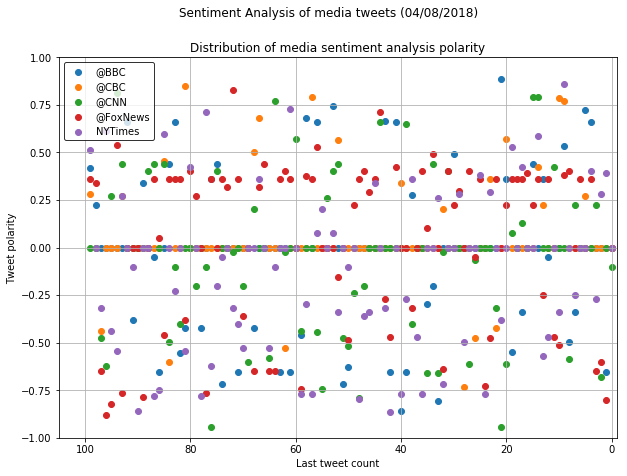

In [212]:
date = time.strftime("%m/%d/%Y")

plt.figure(figsize = (10,7))
plt.xlim(105,-1)
plt.ylim(-1,1)
plt.grid()

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiment_df.loc[news_sentiment_df["User"] == user]
    plt.scatter(dataframe["Tweet Count"],dataframe["Compound"],label = user)    
    

#Title, axis plot
plt.suptitle("Sentiment Analysis of media tweets (%s)"% (date))
plt.title("Distribution of media sentiment analysis polarity")
plt.xlabel("Last tweet count")
plt.ylabel("Tweet polarity")

legend = plt.legend(frameon = True, edgecolor = "black")

# Save an image of the chart and print to screen
plt.savefig("Sentiment_analysis_meadia_tweets.png")
plt.show()


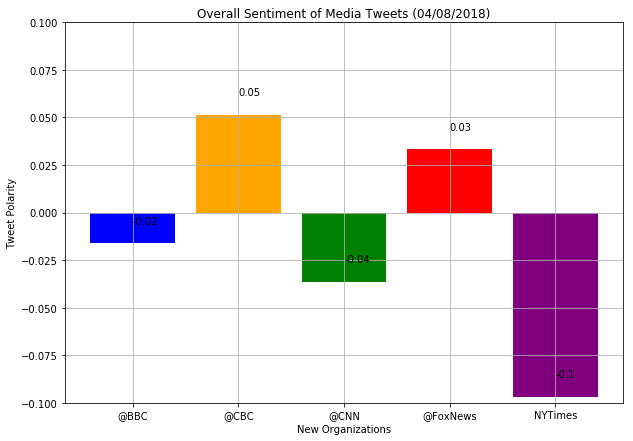

In [225]:
plt.figure(figsize = (10,7))
plt.ylim(-0.1,0.1)
plt.grid()

colors = ["blue", "orange", "green","red","purple"]
x_axis = np.arange(len(news_sentiment_compound_df))
xlabels = news_sentiment_compound_df.index
count = 0

for sentiment in news_sentiment_compound_df:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
    
plt.bar(x_axis, news_sentiment_compound_df, tick_label = xlabels, color = colors)
#Set title, x axis label, and y axis label.


plt.title("Overall Sentiment of Media Tweets (%s)"% (date))
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall_sentiment_of_media_tweets.png")
plt.show()